**read this out first: [article](https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243)**

###What we're going to cover
Specifically, we're going to go through the follow with TensorFlow:

* Getting a dataset to work with
* Architecture of a convolutional neural network
* A quick end-to-end example (what we're working towards)
* Steps in modelling for binary image classification with CNNs
  * Becoming one with the data
  * Preparing data for modelling
  * Creating a CNN model (starting with a baseline)
  * Fitting a model (getting it to find patterns in our data)
  * Evaluating a model
  * Improving a model
  * Making a prediction with a trained model
* Steps in modelling for multi-class image classification with CNNs
* Same as above (but this time with a different dataset)


#### Getting the data
[Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) <br>
**About dataset:** this is a data set of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2025-01-04 07:35:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   145MB/s    in 0.7s    

2025-01-04 07:35:33 (145 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

**dataset looks like:**
* pizza_steak
  * train
    * pizza
    * steak
  * test
    * pizza
    * steak

**! -> prefix for shell commands in colab**

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

**this dataset is a subset of Food-101 with only 2 food categories - pizza and steak**

In [6]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train
# os.listdir("pizza_steak/train/pizza")

750

In [8]:
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))

num_pizza_images_test

250

In [9]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


**lets visualize some images**

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_img = random.sample(os.listdir(target_folder), 1) # dir, number of image to choose at random
    img = mpimg.imread(target_folder + '/' + random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    # plt.show()
    plt.axis('off');

    print(f"Image dimensions: {img.shape}")
    return img

Image dimensions: (512, 306, 3)


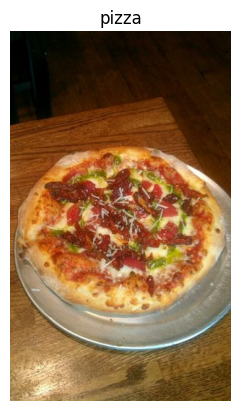

In [11]:
img = view_random_image(target_dir = 'pizza_steak/train/', target_class = 'pizza')

In [12]:
def view_shapes(target_dir, target_class):
    target_folder = target_dir + target_class
    image_dimensions = {(512, 512, 3)} #set
    for img_name in os.listdir(target_folder):
        image_path = target_folder + '/' + img_name
        image = plt.imread(image_path)
        image_dimensions.add(image.shape)
        # print(f"Image dimensions: {image.shape}")

    for dim in image_dimensions: #distinct dimensions
        print(f"dimensions of images in {target_folder} are {dim}")


view_shapes(target_dir='pizza_steak/test/', target_class = 'pizza')

dimensions of images in pizza_steak/test/pizza are (511, 512, 3)
dimensions of images in pizza_steak/test/pizza are (342, 512, 3)
dimensions of images in pizza_steak/test/pizza are (383, 512, 3)
dimensions of images in pizza_steak/test/pizza are (512, 443, 3)
dimensions of images in pizza_steak/test/pizza are (512, 306, 3)
dimensions of images in pizza_steak/test/pizza are (385, 512, 3)
dimensions of images in pizza_steak/test/pizza are (512, 383, 3)
dimensions of images in pizza_steak/test/pizza are (344, 512, 3)
dimensions of images in pizza_steak/test/pizza are (406, 512, 3)
dimensions of images in pizza_steak/test/pizza are (469, 512, 3)
dimensions of images in pizza_steak/test/pizza are (382, 512, 3)
dimensions of images in pizza_steak/test/pizza are (333, 512, 3)
dimensions of images in pizza_steak/test/pizza are (512, 341, 3)
dimensions of images in pizza_steak/test/pizza are (391, 512, 3)
dimensions of images in pizza_steak/test/pizza are (329, 512, 3)
dimensions of images in p

**check this out: [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/)**

#### Data Augmentation:
> **creating 500 new images using data augmentation, 250 of each category**



In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import DirectoryIterator
from PIL import Image

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_dir = 'pizza_steak/train/'

pizza_images_train = [f for f in os.listdir(train_dir+'pizza')]
steak_images_train = [f for f in os.listdir(train_dir+'steak')]

random_images_pizza = random.sample(pizza_images_train, 250)
random_images_steak = random.sample(steak_images_train, 250)


augmented_dir = 'pizza_steak/train/augmented/'
if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

for img_file in random_images_pizza:
    img_path = os.path.join(train_dir+'pizza/', img_file)
    img = Image.open(img_path)
    rotation_angle = random.choice([90, 180])
    rotated_image = img.rotate(rotation_angle, expand = True)
    #Before: The img_array has the shape (224, 224, 3) (height, width, depth/channels). After np.expand_dims(img_array, axis=0): The shape of img_array becomes (1, 224, 224, 3). The added dimension is the batch dimension.
    augmented_dir_pizza = augmented_dir + 'pizza'
    if not os.path.exists(augmented_dir_pizza):
        os.makedirs(augmented_dir_pizza)

    rotated_image.save(os.path.join(augmented_dir_pizza, 'aug_'+img_file))


for img_file in random_images_steak:
    img_path = os.path.join(train_dir+'steak/', img_file)
    img = Image.open(img_path)
    rotation_angle = random.choice([90, 180])
    rotated_image = img.rotate(rotation_angle, expand = True)
    #Before: The img_array has the shape (224, 224, 3) (height, width, depth/channels). After np.expand_dims(img_array, axis=0): The shape of img_array becomes (1, 224, 224, 3). The added dimension is the batch dimension.
    augmented_dir_steak = augmented_dir + 'steak'
    if not os.path.exists(augmented_dir_steak):
        os.makedirs(augmented_dir_steak)

    rotated_image.save(os.path.join(augmented_dir_steak, 'aug_'+img_file))

**viewing augmented images**

pizza_steak/train/augmented/pizza/aug_2556273.jpg


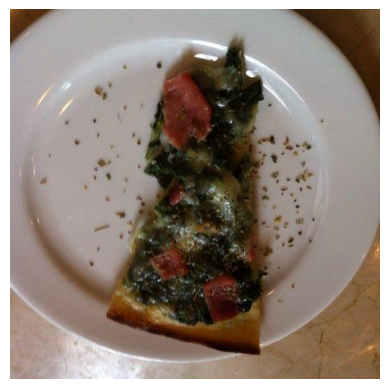

In [14]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img

augmented_images_pizza = os.listdir(augmented_dir+'pizza/')
random_aug_pizza_img = random.choice(augmented_images_pizza)
augmented_img_path = os.path.join(augmented_dir+'pizza/', random_aug_pizza_img)
print(augmented_img_path)
aug_img = load_img(augmented_img_path)

# Display the image using Matplotlib
plt.imshow(aug_img)
plt.axis('off')  # Optional: Turn off the axis for a cleaner view
plt.show()


pizza_steak/train/augmented/steak/aug_2614189.jpg


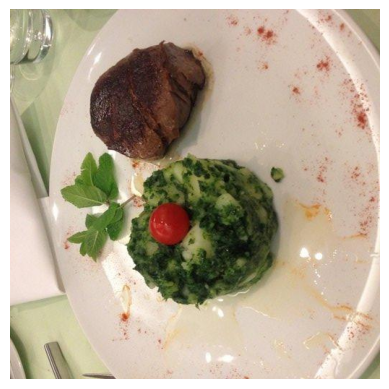

In [15]:

augmented_images_steak = os.listdir(augmented_dir+'steak/')
random_aug_steak_img = random.choice(augmented_images_steak)
augmented_img_path = os.path.join(augmented_dir+'steak/', random_aug_steak_img)
print(augmented_img_path)
aug_img = load_img(augmented_img_path)

# Display the image using Matplotlib
plt.imshow(aug_img)
plt.axis('off')  # Optional: Turn off the axis for a cleaner view
plt.show()

In [16]:
len(os.listdir('pizza_steak/train/augmented/pizza/')), len(os.listdir('pizza_steak/train/augmented/steak/'))

(250, 250)

**normalize the images before training**

####(Lets build a CNN to find patterns in this dataset, more specifically:)
* Load images
* Preprocess images
* Build a CNN to find patterns
* compile CNN
* Fit the CNN to training data

***lets first combine images from augmented folder to our train set as augmented images are used mostly in training the model.***

In [17]:
import shutil
import os
train_dir = 'pizza_steak/train/'
augmented_dir = 'pizza_steak/train/augmented/'

augmented_dir_pizza = augmented_dir + 'pizza/'
train_dir_pizza = train_dir + 'pizza/'
for img in os.listdir(augmented_dir_pizza):
    img_path = os.path.join(augmented_dir_pizza, img)
    shutil.move(img_path, train_dir_pizza)

augmented_dir_steak = augmented_dir + 'steak/'
train_dir_steak = train_dir + 'steak/'
for img in os.listdir(augmented_dir_steak):
    img_path = os.path.join(augmented_dir_steak, img)
    shutil.move(img_path, train_dir_steak)



In [18]:
!ls pizza_steak/train/augmented/pizza

In [19]:
!ls pizza_steak/train/pizza

1008104.jpg  169318.jpg   2432061.jpg  307677.jpg   384215.jpg	 893644.jpg	  aug_2606727.jpg
1008144.jpg  169720.jpg   2439992.jpg  3082068.jpg  3845083.jpg  896448.jpg	  aug_262133.jpg
1008844.jpg  1705747.jpg  2441328.jpg  3082443.jpg  3860002.jpg  898119.jpg	  aug_2640502.jpg
1008941.jpg  1705773.jpg  2443498.jpg  3084957.jpg  3862243.jpg  898303.jpg	  aug_2664219.jpg
1011404.jpg  1708197.jpg  244505.jpg   3102271.jpg  3864383.jpg  898843.jpg	  aug_2667255.jpg
102037.jpg   1717790.jpg  2448844.jpg  3105724.jpg  3871666.jpg  89892.jpg	  aug_2670730.jpg
1026922.jpg  1742542.jpg  2451169.jpg  3109486.jpg  3873326.jpg  899818.jpg	  aug_2671508.jpg
1029698.jpg  1743389.jpg  2456207.jpg  312479.jpg   387697.jpg	 899959.jpg	  aug_2674351.jpg
1033251.jpg  175626.jpg   2462190.jpg  3128495.jpg  3882444.jpg  904938.jpg	  aug_269396.jpg
1035854.jpg  1757288.jpg  2467990.jpg  3148119.jpg  3906901.jpg  910419.jpg	  aug_2702825.jpg
1038357.jpg  1761451.jpg  2468499.jpg  3164761.jpg  3910117.jpg  

In [20]:
!rm -r pizza_steak/train/augmented/

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#The train_datagen is an instance of the ImageDataGenerator class from TensorFlow/Keras. This class is used to preprocess and augment image data before training a deep learning model.
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed = 42)

validation_data = validation_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed = 42)


# architecture: same as https://poloclub.github.io/cnn-explainer/
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Flatten(), #for fully connected layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=62,
                        validation_data=validation_data,
                        validation_steps=15)


Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step - accuracy: 0.5992 - loss: 0.7955 - val_accuracy: 0.8479 - val_loss: 0.3945
Epoch 2/5
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7812 - loss: 0.4504

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7812 - loss: 0.4504 - val_accuracy: 0.8500 - val_loss: 0.4736
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.8116 - loss: 0.4397 - val_accuracy: 0.8521 - val_loss: 0.3729
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.4014 - val_accuracy: 0.8000 - val_loss: 0.3128
Epoch 5/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.8209 - loss: 0.4075 - val_accuracy: 0.8604 - val_loss: 0.3494


<Axes: >

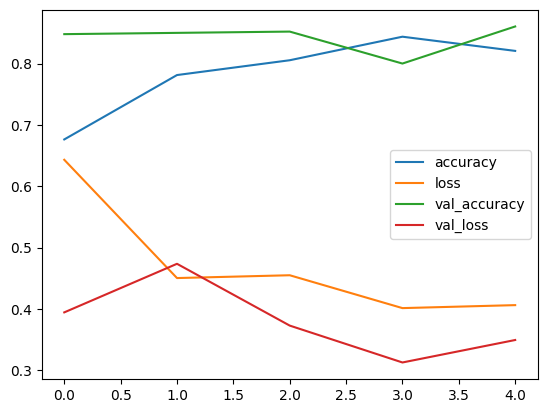

In [22]:
import pandas as pd

pd.DataFrame(history_1.history).plot()

In [23]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [24]:
def plot_loss_curves(history):
    # returns seperate loss curves for trainig and validation metrics
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # plot loss
    plt.plot(epochs, loss, label ='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.title('Loss curves')
    plt.xlabel('epochs')
    plt.legend()

    # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label ='training accuracy')
    plt.plot(epochs, val_accuracy, label='validation accuracy')
    plt.title('Accuracy curves')
    plt.xlabel('epochs')
    plt.legend();
    # plt.show()


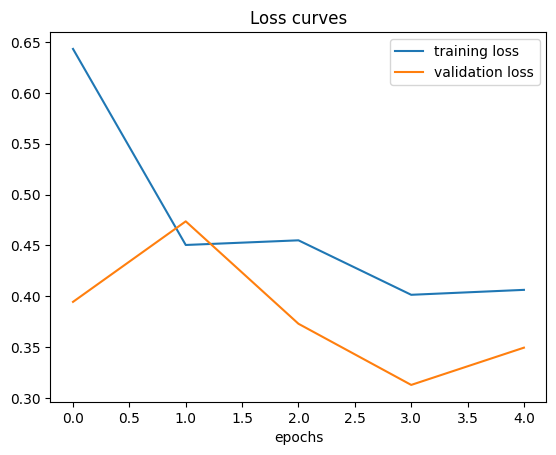

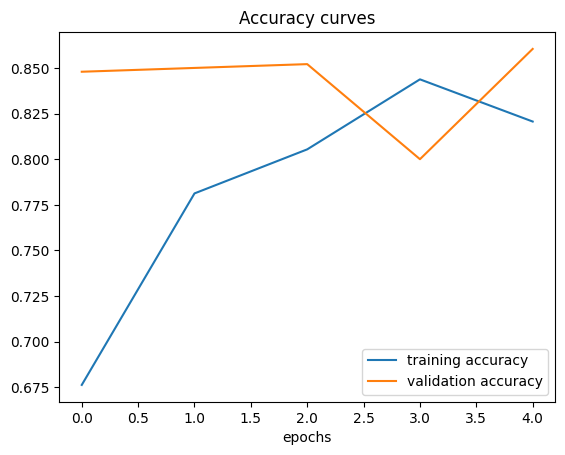

In [25]:
plot_loss_curves(history_1)

***lets create another model with different architecture***

In [26]:
tf.random.set_seed(42)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_2 = tf.keras.Sequential([
    Conv2D(20, 3, activation ='relu', input_shape=(224, 224, 3)),
    Conv2D(20, 3, activation = 'relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(20, 3, activation ='relu'),
    Conv2D(20, 3, activation = 'relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(20, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics=['accuracy'])


history_2 = model_2.fit(train_data, epochs = 10, steps_per_epoch=62, validation_data=validation_data, validation_steps = 32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.5734 - loss: 0.6684

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - accuracy: 0.5747 - loss: 0.6673 - val_accuracy: 0.8320 - val_loss: 0.4249
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7812 - loss: 0.4659 - val_accuracy: 0.8340 - val_loss: 0.4358
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.7873 - loss: 0.4572 - val_accuracy: 0.8360 - val_loss: 0.3902
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8438 - loss: 0.5039 - val_accuracy: 0.8500 - val_loss: 0.3432
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.8084 - loss: 0.4190 - val_accuracy: 0.8500 - val_loss: 0.3475
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9375 - loss: 0.2138 - val_accuracy: 0.8580 - val_loss: 0.3316
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.8335 - loss: 0.3725 - val_accuracy: 0.8540 - val_loss: 0.3455
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8438 - loss: 0.4045 - val_accuracy: 0.8320 - val_lo

<Axes: >

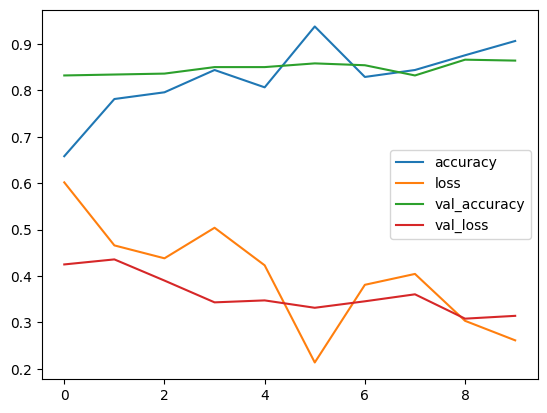

In [27]:
pd.DataFrame(history_2.history).plot()

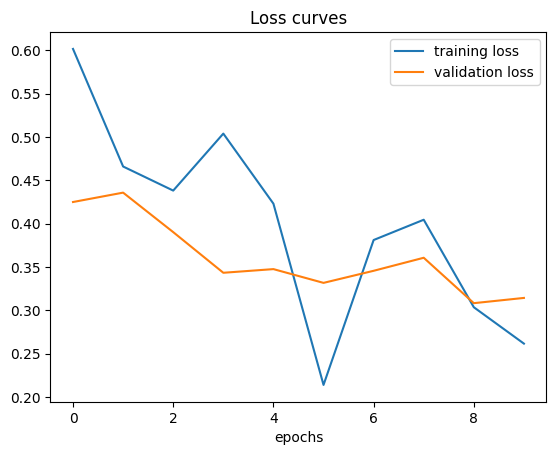

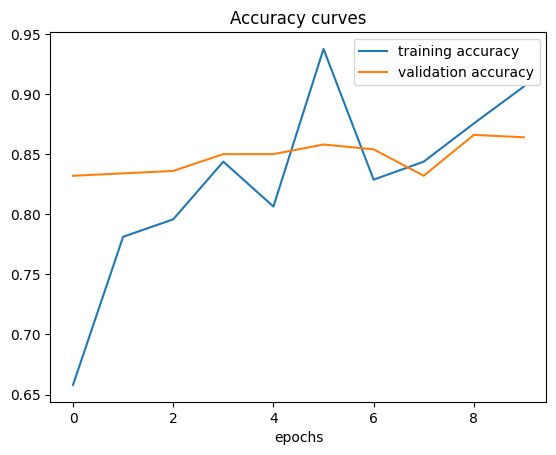

In [28]:
plot_loss_curves(history_2)

In [29]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 20)        │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 20)        │           3,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 20)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 20)        │           3,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 106, 106, 20)        │           3,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 53, 53, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 56180)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │       1,123,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,405,185 (12.99 MB)

 Trainable params: 1,135,061 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,270,124 (8.66 MB)

**in this model, we increased the number of filters in each conv layer while keeping the size of each filter same, we added a Dense layer before the output layer**

In [30]:
print(class_names)

['pizza' 'steak']


#### Making a prediction with trained model

(-0.5, 382.5, 511.5, -0.5)

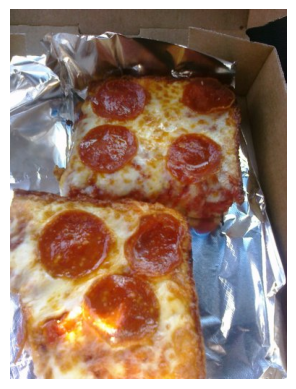

In [31]:
pizza_img = mpimg.imread('/content/pizza_steak/test/pizza/11297.jpg')
plt.imshow(pizza_img)
plt.axis(False)

In [32]:
pizza_img.shape

(512, 383, 3)

In [40]:
def load_and_prep_image(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.expand_dims(img, axis = 0)
    img = img/255.0
    return img

In [47]:
pizza_img_load = load_and_prep_image(pizza_img)
pizza_img_load

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.3308123 , 0.29159662, 0.24453782],
         [0.33619887, 0.29698318, 0.24992435],
         [0.34833622, 0.30912054, 0.26206172],
         ...,
         [0.4263662 , 0.31656227, 0.273425  ],
         [0.42509314, 0.30795375, 0.26848423],
         [0.41203597, 0.29438892, 0.25517324]],

        [[0.32296044, 0.28374475, 0.23668593],
         [0.33360532, 0.29438964, 0.2473308 ],
         [0.34057248, 0.30135676, 0.25429794],
         ...,
         [0.44285715, 0.33305323, 0.2859944 ],
         [0.43185395, 0.32205003, 0.27865893],
         [0.4177553 , 0.3079514 , 0.26481414]],

        [[0.33974028, 0.3005246 , 0.25346577],
         [0.35204643, 0.31283075, 0.26577193],
         [0.34518555, 0.30596986, 0.25891104],
         ...,
         [0.41573012, 0.30956465, 0.26078135],
         [0.42767486, 0.31932774, 0.27274662],
         [0.41797224, 0.31570438, 0.2695398 ]],

        ...,

        [[0.6524221 , 0.68071276, 

In [48]:
model_2.predict(pizza_img_load)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.4378655]], dtype=float32)

In [49]:
# pizza_img_load = tf.expand_dims(pizza_img_load, axis = 0)
# pizza_img_load.shape

In [50]:
pred = model_2.predict(pizza_img_load)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.4378655]], dtype=float32)

In [51]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'pizza'

In [94]:
def load_img_predict_class(model, img, class_names):
    org_image = img
    img = load_and_prep_image(img)
    # img = tf.expand_dims(img, axis = 0)
    pred = model.predict(img)

    # pred_class = class_names[int(tf.round(pred)[0][0])]
    pred_class = class_names[int(tf.round(pred)[0][0])]

    plt.imshow(org_image)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


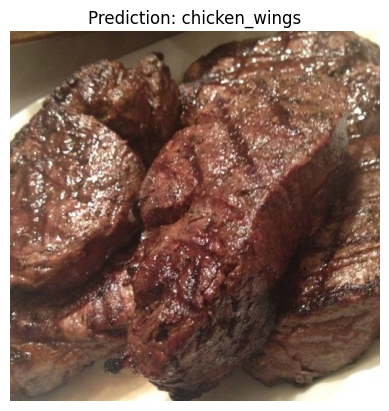

In [95]:
img = mpimg.imread('pizza_steak/test/steak/2071320.jpg')
load_img_predict_class(model_2, img, class_names )

## Multi-Class Classification

### Import the data and visualize it

In [54]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2025-01-04 07:42:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  70.6MB/s    in 8.6s    

2025-01-04 07:42:19 (57.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [55]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"Thhere are {len(dirnames)} dirs and {len(filenames)} images in {dirpath}.")

Thhere are 2 dirs and 0 images in 10_food_classes_all_data.
Thhere are 10 dirs and 0 images in 10_food_classes_all_data/train.
Thhere are 0 dirs and 750 images in 10_food_classes_all_data/train/ice_cream.
Thhere are 0 dirs and 750 images in 10_food_classes_all_data/train/chicken_wings.
Thhere are 0 dirs and 750 images in 10_food_classes_all_data/train/chicken_curry.
Thhere are 0 dirs and 750 images in 10_food_classes_all_data/train/fried_rice.
Thhere are 0 dirs and 750 images in 10_food_classes_all_data/train/ramen.
Thhere are 0 dirs and 750 images in 10_food_classes_all_data/train/hamburger.
Thhere are 0 dirs and 750 images in 10_food_classes_all_data/train/steak.
Thhere are 0 dirs and 750 images in 10_food_classes_all_data/train/pizza.
Thhere are 0 dirs and 750 images in 10_food_classes_all_data/train/sushi.
Thhere are 0 dirs and 750 images in 10_food_classes_all_data/train/grilled_salmon.
Thhere are 10 dirs and 0 images in 10_food_classes_all_data/test.
Thhere are 0 dirs and 250 ima

In [56]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'



In [57]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = [item.name for item in data_dir.glob('*')]
class_names

['ice_cream',
 'chicken_wings',
 'chicken_curry',
 'fried_rice',
 'ramen',
 'hamburger',
 'steak',
 'pizza',
 'sushi',
 'grilled_salmon']

Image dimensions: (320, 512, 3)


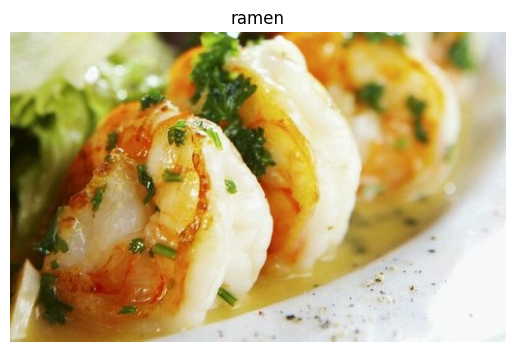

In [63]:
#visualizing images in train set

import random

img = view_random_image(target_dir=train_dir, target_class='ramen')

### Preprocess the data

In [64]:
# train_dir.

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)


train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size = 32,
                                               class_mode='categorical')

test_data = validation_datagen.flow_from_directory(test_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='categorical')
# train_data = train_data.repeat()
# test_data = test_data.repeat()


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Creating the model

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model_3 = Sequential([
    Conv2D(32, 3, activation = 'relu', input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation = 'relu'),
    Conv2D(32, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation = 'relu'), #FC layer
    Dense(10, activation = 'softmax') # output layer -> P(ci)
])


model_3.compile(loss='categorical_crossentropy',
                optimizer= Adam(),
                metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
history_3 = model_3.fit(train_data,
                        epochs=5, #,
                        # steps_per_epoch=len(train_data)//32,
                        validation_data=test_data)
                        # validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 158ms/step - accuracy: 0.1438 - loss: 2.4301 - val_accuracy: 0.2716 - val_loss: 2.0460
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - accuracy: 0.2803 - loss: 2.0255 - val_accuracy: 0.3000 - val_loss: 1.9625
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 125ms/step - accuracy: 0.3783 - loss: 1.8367 - val_accuracy: 0.2672 - val_loss: 2.0276
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 143ms/step - accuracy: 0.5548 - loss: 1.3122 - val_accuracy: 0.2732 - val_loss: 2.3329
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 126ms/step - accuracy: 0.8330 - loss: 0.5309 - val_accuracy: 0.2796 - val_loss: 3.4798


In [109]:
model_3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.2919 - loss: 3.4671


[3.4798085689544678, 0.27959999442100525]

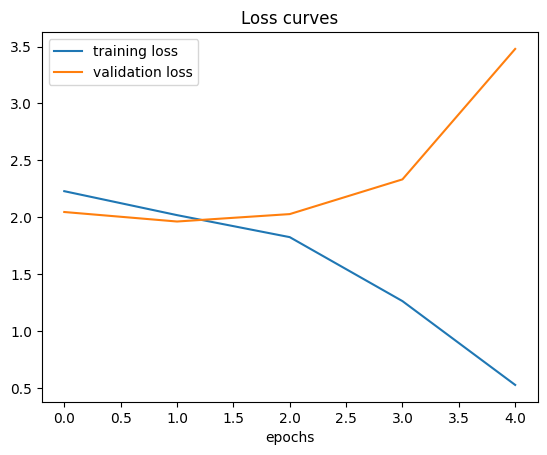

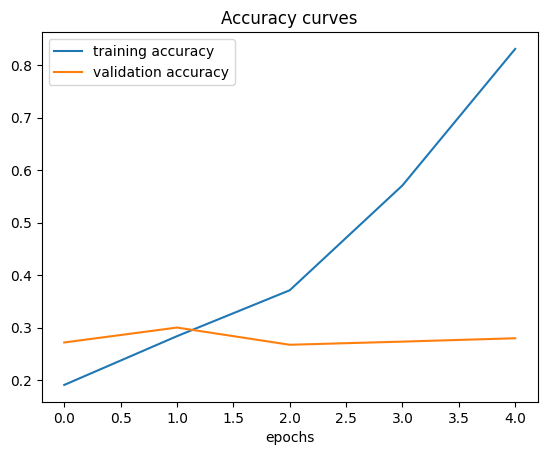

In [110]:
plot_loss_curves(history_3)

### nah, not what i wanted, lets try sth else

In [111]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=20,
                                             width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             zoom_range=0.1,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224, 224),
                                                                batch_size=32,
                                                                class_mode='categorical')


Found 7500 images belonging to 10 classes.


### Viewing a random image from augmented train data

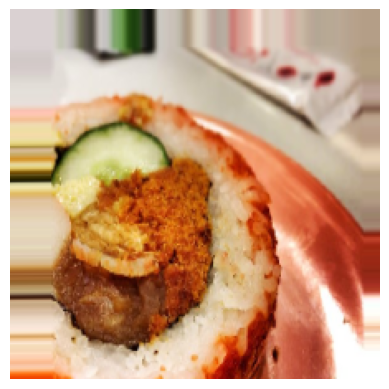

In [112]:
import numpy as np
import matplotlib.pyplot as plt

images, labels = next(train_data_augmented)

random_index = np.random.randint(0, len(images))
random_image = images[random_index]

plt.imshow(random_image)
plt.axis(False)
plt.show()

**rather than creating the same model again, we can use sth called as *clone model*      to clone it and use it again on different data(org+augmented)**

In [113]:
model_4 = tf.keras.models.clone_model(model_3) #use the same architecture, but pattern are not learnt

model_4.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data_augmented, epochs=5,# steps_per_epoch=len(train_data_augmented)//32,
                        validation_data=test_data)
                        # ,
                        # validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 113s 455ms/step - accuracy: 0.1052 - loss: 2.3873 - val_accuracy: 0.1004 - val_loss: 2.3027
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 453ms/step - accuracy: 0.0957 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 442ms/step - accuracy: 0.0975 - loss: 2.3028 - val_accuracy: 0.1120 - val_loss: 2.2940
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 451ms/step - accuracy: 0.1124 - loss: 2.2995 - val_accuracy: 0.1304 - val_loss: 2.2885
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 434ms/step - accuracy: 0.1412 - loss: 2.2824 - val_accuracy: 0.2032 - val_loss: 2.1854


In [114]:
model_4.fit(train_data_augmented, epochs=3,# step
3

            s_per_epoch=len(train_data_augmented)//32,
                        validation_data=test_data)


Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 111s 461ms/step - accuracy: 0.1884 - loss: 2.2068 - val_accuracy: 0.2476 - val_loss: 2.1076
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 108s 449ms/step - accuracy: 0.2259 - loss: 2.1398 - val_accuracy: 0.2760 - val_loss: 2.0041
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 441ms/step - accuracy: 0.2528 - loss: 2.0936 - val_accuracy: 0.2968 - val_loss: 1.9719


In [115]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


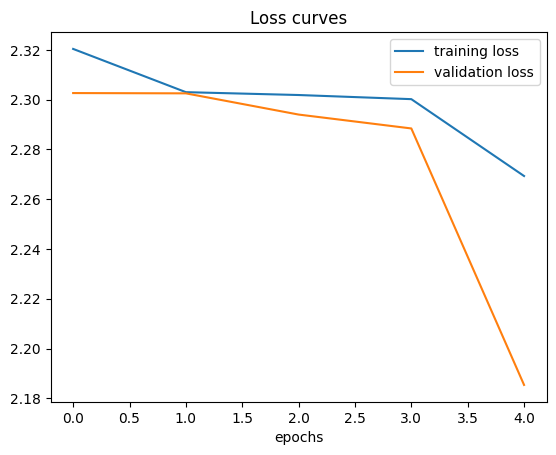

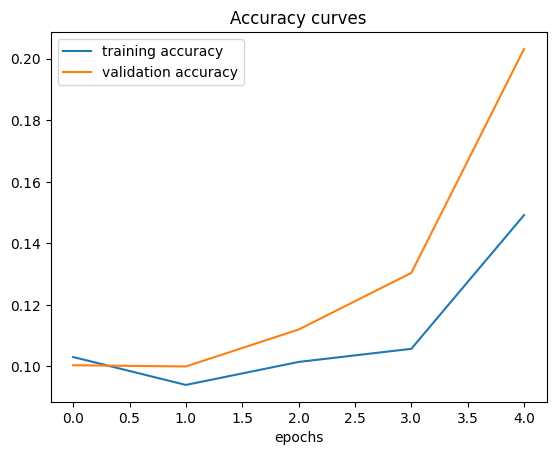

In [116]:
plot_loss_curves(history_4)

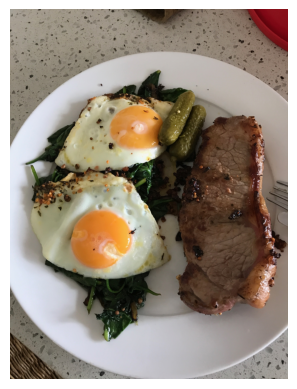

In [117]:
import matplotlib.image as mpimg
img = mpimg.imread('03-steak.jpeg')
plt.imshow(img)
plt.axis(False)
plt.show()

In [118]:
# load_img_predict_class(model_4, mpimg.imread("sample_data/03-steak.jpeg"), class_names)

In [119]:
# pred_and_plot(model_4, "03-pizza-dad.jpeg", class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


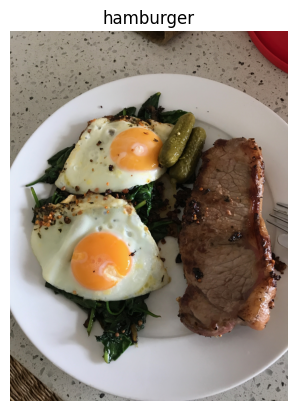

In [120]:
import matplotlib.image as mpimg

org_img = mpimg.imread("03-steak.jpeg")
img = load_and_prep_image(org_img)

# Make a prediction
pred = model_4.predict(img)

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(org_img)
plt.title(pred_class)
plt.axis(False);

In [121]:
pred = model_4.predict(img)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.0233755 , 0.03583408, 0.0570116 , 0.07038549, 0.10329043,
        0.22808681, 0.07485076, 0.06042012, 0.22665842, 0.12008681]],
      dtype=float32)

In [122]:
class_names[pred.argmax()]


'hamburger'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


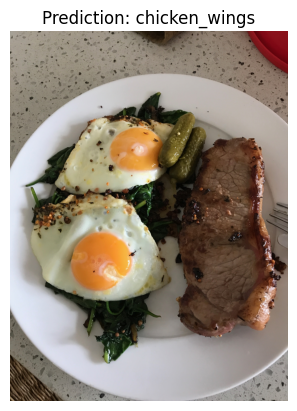

In [123]:
img = mpimg.imread('03-steak.jpeg')
load_img_predict_class(model_2, img, class_names )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


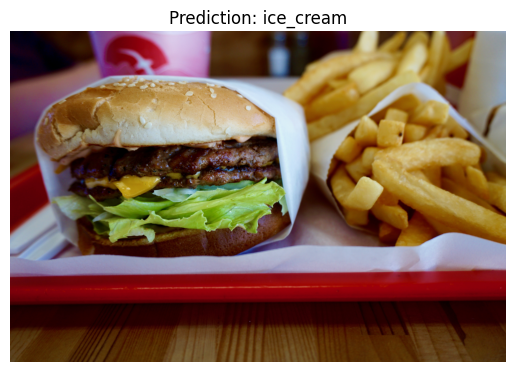

In [124]:
load_img_predict_class(model_4, mpimg.imread("03-hamburger.jpeg"), class_names)